# <Font color = 'brown'><center>Univariate Logistic Regression

### <font color='blue'>Logistic Regression:
    
    
Logistic Regression is a Machine Learning algorithm based on supervised learning which is used for the classification problems for categorical variables, it is a predictive analysis algorithm and based on the concept of probability.
    
- In Linear Regression the output is expected as Numerical type.
- In Logistic Regression the output is expected as Categorical type.
    
<div>
<img src="https://excelrcom.b-cdn.net/assets/admin/ckfinder/userfiles/images/2020%20uploads/11/1.PNG" width='400'>
</div>

## <font color='blue'>Binary Classification
    
The most common use of logistic regression models is in binary classification problems
    
    
**Examples of Classification:**
1. Finance Company wants to know whether a customer is default or not.
2. Predicting an email is spam or ham
3. Categorizing email into promotional, personal and official
    
    
**Binary Classification:**
1. Two Possible outputs
2. Examples:
    1. Default example
    2. spam/ham 
3. In the case of email categorizing into promotional, ersonal and official is called **Multi Class Classification**

**Example:**

Lets take a example of Daibetes dataset, which is shown below

In [1]:
# Importing pandas
import pandas as pd 

diabetes = pd.read_csv(r"C:\My files\Upgrad Data science\1. Main Course\5. Machine learning 1\3. Logistic Regression\1. Univariate Logistic Regression\1. Data\Diabetes Example Data.csv")
diabetes

,Blood Sugar Level,Diabetes
0,190,No
1,240,Yes
2,300,Yes
3,160,No
4,200,Yes
5,269,Yes
6,129,No
7,141,No
8,220,No
9,337,Yes


Here the `Blood Sugar Level` is the independent variable which numerical in nature, where as  `Dabetes` is the dependent variable which is categorical in nature.

If we change `No into 0`, `Yes int 1` the data will look as follows

In [2]:
# Changing 'Yes' and 'No' in to "1" and "0"

diabetes.Diabetes = diabetes.Diabetes.replace({"No":0,"Yes":1})
diabetes

,Blood Sugar Level,Diabetes
0,190,0
1,240,1
2,300,1
3,160,0
4,200,1
5,269,1
6,129,0
7,141,0
8,220,0
9,337,1


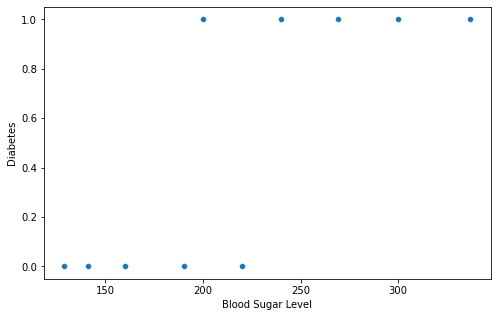

In [9]:
# Let us plot scatter plot "Blood Sugar Level" Vs "Diabetes"

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=[8,5])
sns.scatterplot(diabetes["Blood Sugar Level"],diabetes.Diabetes);

As we can see if `Blood Sugar Level` is more than `200` we can say the person is diabetic

however Suppose there is another person, with a blood sugar level of 195, and you do not know whether that person has diabetes or not. What would you do then? Would you classify him/her as a diabetic or as a non-diabetic?

<div>
<img src="https://miro.medium.com/max/1094/1*yNN-W-rHamIJKYtRuYexvw.png" width='800'>
</div>

We need to predict a person is diabetic or not. So now we have plotted the blood sugar on the x-axis and diabetes on the y-axis. As we can see in the 1st image. Red points show non-diabetics and the blue point show diabetic person.


We can decide based on the decision boundary as we can see in image-2 (top right). We could say that all person with sugar level more the 210 is diabetics. And the patient with less than 210 sugar level is non-diabetic.


So in that case out prediction represents a curve shown in the image-3 bottom left. But there is a problem in this curve we misclassified 2 points. So now the question is, Is there a decision boundary that helps us with zero is classification. Ans is there is none.


The best case would be the one with a cutoff around 195 in image-4 (bottom right), So there would be one miss classification.


There is a problem with this approach, especially near the middle of the graph. We can not cutoff based on some assumptions. It will be risky. This person’s sugar level (195 mg/dL) is very close to the threshold (200 mg/dL). Quite possible that this person was a non-diabetic with a little high blood sugar level. After all, the data does have people with little high sugar levels (220 mg/dL) (image-4), who are not diabetics.

---

## <font color='blue'>Sigmoid Curve

We saw an example of a binary classification problem. Where a model is trying to predict whether a person has diabetes or not based on his/her blood sugar level. And we saw how using a simple boundary decision method would not work in this case.

So one way to overcome this problem of sharp curve, with probability.

<div>
<img src="https://www.nucleusbox.com/wp-content/uploads/2020/06/image-7.png" width='400'>
</div>

We want the person probability of (red points) low blood sugar would be very low. And the blue point where the blood sugar level is very high, we would like to have a high probability.

And for an intermediate point where the sugar level in the range is not high and low. There we would like to have the probability close to 0.5 or 0.6.

So one possible curve, which called as a Sigmoid curve as show below.


$$y \ (Probability \ of \ Daibetes) = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:

**Sigmoid Curve**
    
This is the sigmoid curve equation: $y=P(Daibetes) = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$.Here, let’s say you take $\beta_{0} = -15$ and $\beta_{1} = 0.065$. Now, what will be the probability of diabetes for a patient with sugar level 220 $(x=220)$?
    
    
#### <font color='blue'>Answer:
    
**0.33**

#### <font color='blue'>Question_2:

**Sigmoid Curve**
    
For the sigmoid curve ($\beta_{0} = -15$ and $\beta_{1} = 0.065$). what will be the probability of diabetes for a patient with sugar level 240?
    
    
#### <font color='blue'>Answer:
    
**0.65**

Where ($\beta_{0} = -15$ and $\beta_{1} = 0.065$), So, the Sigmoid curve has all the properties you would want. Low values in the start, high values in the end, and intermediate values in the middle. It’s a good choice for modeling the value of the probability of diabetes.

So now we have verified, with actual values, that the sigmoid curve actually has the properties we discussed earlier, i.e. extremely low values in the start, extremely high values in the end, and intermediate values in the middle.


However, you may be wondering — why can’t you just fit a straight line here? This would also have the same properties — low values in the start, high ones towards the end, and intermediate ones in the middle.


Because the main problem with a straight line is that it is not steep enough. In the sigmoid curve, as you can see, you have low values for a lot of points. Then the values rise suddenly, after which you have a lot of high values.

In a straight line though, the values rise from low to high very along with the line. And hence, the “boundary” region, where the probabilities transition from high to low is not present.


<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/01372842-d682-46d2-b37a-fc51560d9629/diabetes.png" width='700'>
</div>

---

## <font color='blue'>Finding the Best Fit Sigmoid Curve - I
    
We saw what a sigmoid function is and why it is a good choice for modelling the probability of a class. Now, in this section, you will learn how you can find the **best fit sigmoid curve**. In other words, you will learn how to find the combination of $\beta_{0} \ and \ \beta_{1}$ which fits the data best.

So, by varying the values of $\beta_{0} \ and \ \beta_{1}$ you get different sigmoid curves. Now, based on some function that you have to minimise or maximise, you will get the best fit sigmoid curve.

Before you move on to that, You can use it and see for yourself how the curve changes when the values of $\beta_{0} \ and \ \beta_{1}$ are changed.



[click here](https://da-upgrad.shinyapps.io/sigmoid/)


Let say we have 10 data point p1,p2,p3,p4,p5,p6,p7,p8,p9,p10 as bellow. Now lets pick the 4th data point which is p4. We want p4 value as small as possible.

<div>
<img src="https://www.nucleusbox.com/wp-content/uploads/2020/06/image-18.png" width='500'>
</div>

So for p4 value where the patient is not diabetic, we want this value as low as possible. And for p3,p2, p1, and p6 as well (as low as possible).

Now for the other points like p5,p7,p8,p9,p10. The probability of these people being diabetics value as large as possible.

<div>
<img src="https://www.nucleusbox.com/wp-content/uploads/2020/06/image-19.png" width='500'>
</div>

So we have 5 numbers like the lowest possible and 5 numbers which we want as the largest possible.

There is another way to interpret p4 value.

For example, if we say We want to minimize p4 value, at the same time we can also say we want to maximize (1-p4) value. Both interpretations are the same.

**<center>min of p4 = max of (1-p4) in probability terms</center>**

So, we can extend this opinion and we will maximize the other value.

So, the best fitting combination of $\beta_{0} \ and \ \beta_{1}$ will be the one which maximizes the product:

$$(1−P_1)(1−P_2)(1−P_3)(1−P_4)(1−P_6)(P_5)(P_7)(P_8)(P_9)(P_{10})$$


This product is called the **likelihood function**

$$[(1−Pi)(1−Pi)—— for all nan-diabetics ——–] * [(Pi)(Pi) ——– for all diabetics ——-]$$

So, say that for the ten points in our example, the labels are a little different, somewhat like this:


|         | | | | | | | | | |  |
|---------|-|-|-|-|-|-|-|-|-|--|
|Point no.|1|2|3|4|5|6|7|8|9|10|
|Diabetes|no|no|no|yes|no|yes|no|yes|yes|yes|

In this case, the likelihood would be equal to

$$(1-P_1)(1-P_2)(1-P_3)(1-P_5)(1-P_7)(P_4)(P_6)(P_8)(P_9)(P_{10})$$

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:

**Likelihood**
    
Now, let’s say that for the ten points in our example, the labels are as follows:

|         | | | | | | | | | |  |
|---------|-|-|-|-|-|-|-|-|-|--|
|Point no.|1|2|3|4|5|6|7|8|9|10|
|Diabetes|no|no|no|yes|no|yes|yes|yes|yes|yes|
    
In this case, the likelihood would be equal to:
    
- $(1-P_1)(1-P_2)(1-P_3)(1-P_4)(1-P_5)(P_6)(P_7)(P_8)(P_9)(P_{10})$
    
    
- $(1-P_1)(1-P_2)(1-P_3)(1-P_5)(P_4)(P_6)(P_7)(P_8)(P_9)(P_{10})$
    
    
- $(P_1)(P_2)(P_3)(P_4)(P_5)(1-P_6)(1-P_7)(1-P_8)(1-P_9)(1-P_{10})$
   
    
- $(P_1)(P_2)(P_3)(P_5)(1-P_4)(1-P_6)(1-P_7)(1-P_8)(1-P_9)(1-P_{10})$
    
#### <font color='blue'>Answer:
    
**$(1-P_1)(1-P_2)(1-P_3)(1-P_5)(P_4)(P_6)(P_7)(P_8)(P_9)(P_{10})$**
    
Recall that likelihood is the product of $(1-P_{i})$ for all non-diabetic patients and $(P_{i})$ for all diabetic patients. Hence, the likelihood is given by $(1-P_1)(1-P_2)(1-P_3)(1-P_5)$ (all non-diabetic patients) multiplied by $(P_4)(P_6)(P_7)(P_8)(P_9)(P_{10})$ (all diabetic patients).

---

## <font color='blue'> Finding the Best Fit Sigmoid Curve - II

To recap, the likelihood function for our data is $(1−P_1)(1−P_2)(1−P_3)(1−P_4)(1−P_6)(P_5)(P_7)(P_8)(P_9)(P_{10})$ The best-fitting sigmoid curve would be the one which maximises the value of this product.

Let us try to understand on how this best-fitting sigmoid curve can be found. If you had to find $\beta_{0} \ and \ \beta_{1}$ for the best-fitting sigmoid curve, you would have to try a lot of combinations, unless you arrive at the one which maximises the likelihood. This is similar to linear regression, where you vary $\beta_{0} \ and \ \beta_{1}$ ntil you find the combination that minimises the cost function. 

In the interactive app given below, you can try a few combinations yourself and see how the likelihood varies with betas.

[click here](https://da-upgrad.shinyapps.io/likelihood/)


So, just by looking at the curve here, you can get a general idea of the curve’s fit. Just look at the yellow bars for each of the 10 points. A curve that has a lot of big yellow bars is a good curve. For example, this curve is not a good fit:

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/f506bb86-4cbc-4da9-bc3e-a34ac0e4c437/likeli1.png" width='800'>
</div>

This curve, though, is a better fit -

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/2f000ec0-80be-4db5-ab25-2359ac3f4abd/beta.png" width='800'>
</div>

Clearly, this curve is a better fit. It has many big yellow bars, and even the small ones are reasonably large. Just by looking at this curve, you can tell that it will have a high likelihood value.

---

## <font color='blue'>Odds and Log Odds

### <font color='blue'>Logistic Regression in Python
    
Let's now look at how logistic regression is implemented in python.

 
In python, logistic regression can be implemented using libraries such as SKLearn and statsmodels, though looking at the coefficients and the model summary is easier using statsmodels. 

 
You can find the optimum values of $\beta_{0} \ and \ \beta_{1}$ using the python code given below.

In [11]:
# Putting feature variable to X
X = diabetes['Blood Sugar Level']

# Putting response variable to y
y = diabetes['Diabetes']

In [13]:
import statsmodels.api as sm
logm1 = sm.GLM(y,(sm.add_constant(X)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Diabetes   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.5838
Date:                Fri, 29 Oct 2021   Deviance:                       5.1676
Time:                        17:21:55   Pearson chi2:                     4.32
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.5243      9.35

In the summary shown above, `const` corresponds to $\beta_{0}$ and Blood Sugar Level, i.e. `x1` corresponds to $\beta_{1}$ . So,$\beta_{0}=-13.5243$ and $\beta_{1}=0.0637$

### <font color='blue'>Odds and Log Odds
    
So far, you’ve seen this equation for logistic regression:
$$P=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$
    
While the equation is correct, it is not very intuitive. In other words, the relationship between P and x is so complex that it is difficult to understand what kind of trend exists between the two. If you increase x by regular intervals of, say, 11.5, how will that affect the probability? Will it also increase by some regular interval? If not, what will happen?

 

So, clearly, the relationship between P and x is too complex to see any apparent trends. However, if you convert the equation to a slightly different form, you can achieve a much more intuitive relationship. In the next video, let’s hear from Prof. Dinesh on how that can be done.
    
    
    
[Note: By default, for this course, if the base of the logarithm is not specified, take it as e. So,  $log(x)=log_e(x)$.]

**Linearising The Sigmoid Function:**

$$P=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$



$$1-P=\frac{e^{-(\beta_{0}+\beta_{1}x)}}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$


If we devide the both equation we will get

$$\frac{P}{1-P} = e^{(\beta_{0}+\beta_{1}x)}$$

Lets take log on both sides,

$$ln\big(\frac{P}{1-P}\big)=\beta_{0}+\beta_{1}x$$

where $\beta_{0}=-13.5243$ and $\beta_{1}=0.0637$

<br><br>

**Interpreting $\frac{p}{1-P}$:**

now we having the equation of,$$ln\big(\frac{P}{1-P}\big)=\beta_{0}+\beta_{1}x$$

here $$\frac{P}{1-P} = Odds$$ 


$$ln\big(\frac{P}{1-P}\big) = Log \  Odds$$

Let's try to interpret the $\frac{p}{1-P}$

Lets say $$\frac{p}{1-P}=4$$

which means

$$P(Diabetes) = 4 \times{P(No \ Diabetes)}$$

<br><br>

**Relationship Between Odds and Probability:**


If $P=0.5$, then the 

$Odds = \frac{0.5}{1-0.5} = 1$

If $Odds = 2$ Then the 

$\frac{P}{1-p} = 2 \Rightarrow P = 2 - 2P \Rightarrow 3P = 2 \Rightarrow P=0.67$

So, now, instead of probability, you have odds and log odds. Clearly, the relationship between them and x is much more intuitive and easy to understand.

For example, if you increase x by regular intervals of, say, 11.5, how will that affect the log odds?

### <font color='blue'>Quiz

#### <font color='blue'>Question_1:

**Log Odds**
    
So, let’s say that the equation for the log odds is:
    
$$ln\big(\frac{P}{1-P}\big)= -13.5+0.06x$$

For x = 220, the log odds are equal to -13.5+(0.06*220) = -0.3. For x = 231.5, log odds are equal to:
    
#### <font color='blue'>Answer:
    
**0.39**

#### <font color='blue'>Question_1:

**Log Odds**
    
So, let’s say that the equation for the log odds is:
    
$$ln\big(\frac{P}{1-P}\big)= -13.5+0.06x$$

For x = 220, the log odds are equal to -0.3 and for x = 231.5, the log odds are equal to 0.39. For x = 243, the log odds are equal to:
    
#### <font color='blue'>Answer:
    
**1.08**

So, the relationship between x and probability is not intuitive, while that between x and odds/log odds is. This has important implications. Suppose you are discussing sugar levels and the probability they correspond to. While talking about 4 patients with sugar levels of 180, 200, 220 and 240, you will not be able to intuitively understand the relationship between their probabilities (10%, 28%, 58%, 83%). However, if you are talking about the log odds of these 4 patients, you know that their log odds are in a linearly increasing pattern (-2.18, -0.92, 0.34, 1.60) and that the odds are in a multiplicatively increasing pattern (0.11, 0.40, 1.40, 4.95, increasing by a factor of 3.55).

 

Hence, many times, it makes more sense to present a logistic regression model’s results in terms of log odds or odds than to talk in terms of probability. This happens especially a lot in industries like finance, banking, etc.


That's the end of this session on univariate logistic regression. You studied logistic regression, specifically, the sigmoid function, which has this equation:

$$P=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$

---

## <font color='blue'> Summary

We first learnt what a binary classification is. Basically, it is a classification problem in which the target variable has only 2 possible values.

We then went through the **diabetes example** in detail, wherein you tried to predict whether a person has diabetes or not based on that person’s blood sugar level.

We had seen why a **simple boundary decision approach** does not work very well for this example. It would be too risky to decide the class blatantly on the basis of the cutoff because, especially in the middle, the patients could belong to any class — diabetic or non-diabetic.

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/001a94da-f0b8-4168-a226-763e97d5da60/1.png" width='400'>
</div>

Hence, we learnt that it is better to talk in terms of **probability**. One such curve which can model the probability of diabetes very well is the **sigmoid curve**.

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/62704a33-dec0-4c70-a1f6-28e87d27482e/2.png" width='400'>
</div>

Its equation is given by the following expression:

$$P(Diabetes)=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$

Then, we learnt that in order to find the **best-fit sigmoid curve**, you need to vary $\beta_{0} \ and \ \beta_{1}$ until we get the combination of beta values that maximises the **likelihood**. For the diabetes example, the likelihood is given by the expression:

<div>
<img src="https://cdn.upgrad.com/UpGrad/temp/e1fe6e82-7f45-4413-8eff-a9a0935182ad/3.png" width='400'>
</div>

$$Likelihood = (1−P_1)(1−P_2)(1−P_3)(1−P_4)(P_5)(1−P_6)(P_7)(P_8)(P_9)(P_{10})$$

It is the product of:

$$[(1−P_i)(1−P_i)—— for all nan-diabetics ——–] * [(P_i)(P_i) ——– for all diabetics ——-]$$

This process, where you vary the betas until you find the best fit curve for the probability of diabetes, is called **logistic regression.**

After this, you saw a simpler way of interpreting the equation for logistic regression. We saw that the following linearised equation is much easier to interpret:

$$ln\big(\frac{P}{1-P}\big)=\beta_{0}+\beta_{1}x$$


The left-hand side of this equation is what is called **log odds**. Basically, the odds of having diabetes $(\frac{P}{1-P})$, indicate how much likelier a person is to have diabetes than to not have it. For example, a person for whom the odds of having diabetes are equal to 3, is 3 times more likely to have diabetes than to not have it. In other words, P(Diabetes) = 3 * P(No diabetes).

 

we also saw how odds vary with variation in x. Basically, with every **linear increase** in x, the increase in odds is multiplicative. For example, in the diabetes case, after every increase of 11.5 in the value of x, the odds are approximately doubled, i.e. they increase by a **multiplicative** factor of about 2.

---

## <font color='blue'>Important things to remember

#### <font color='blue'>Logistic Regression Definition:

Logistic Regression is based on the **Supervised Learning Machine Learning Classification algorithm** that is used to **predict the probability of a categorical dependent variable**. In logistic regression, the **dependent variable** is a **binary variable** that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

In other words, the Logistic Regression model predicts P(Y=1) as found X.

Broadly there are two types of Logistic Regression
- **Binary Classification:** The Output variable is in two category (yes/no, spam/ham, default/not-default)
- **Multiclass Classfication:** The Output variable is more than two categories (Grades, salary - High/Medium/Low)

#### <font color = 'blue'>Sigmoid Function:
**The Predicted Probability of catagorical dependent variable** is caluculated by **Sigmoid Function**, Which is given by,

$$P(Y=1) = \frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$


#### <font color='blue'> Cost Function: 

In Logistic Regression the cost function is called **likelihood function** which is the product of all the poabailities of the data points, In such way that the probality of P(Y=0) is to minimisie and P(Y=1) to maximise or both **P(Y=1) and 1-P(Y=0) to be maximised**.
    
    
Let See the below example of 10 datapoints to understand:


|         | | | | | | | | | |  |
|---------|-|-|-|-|-|-|-|-|-|--|
|Point no.|1|2|3|4|5|6|7|8|9|10|
|Dependent Variable Outcome|no|no|no|yes|no|yes|no|yes|yes|yes|

In this case, the likelihood would be equal to

$$(1-P_1)(1-P_2)(1-P_3)(1-P_5)(1-P_7)(P_4)(P_6)(P_8)(P_9)(P_{10})$$

**In sum**: The **Likelihood function** to be maximised to finding the best **Sigmoid Curve**

#### <font color='blue'>Linearising the Sigmoid function:

$$P=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$



$$1-P=\frac{e^{-(\beta_{0}+\beta_{1}x)}}{1+e^{-(\beta_{0}+\beta_{1}x)}}$$


If we devide the both equation we will get

$$\frac{P}{1-P} = e^{(\beta_{0}+\beta_{1}x)}$$

Lets take log on both sides,

$$ln\big(\frac{P}{1-P}\big)=\beta_{0}+\beta_{1}x$$


<br><br>

**Interpreting $\frac{p}{1-P}$:**

now we having the equation of,$$ln\big(\frac{P}{1-P}\big)=\beta_{0}+\beta_{1}x$$

here $$\frac{P}{1-P} = Odds$$ 


$$ln\big(\frac{P}{1-P}\big) = Log \  Odds$$

Let's try to interpret the $\frac{p}{1-P}$

Lets say $$\frac{p}{1-P}=4$$

which means

$$P(Y=1) = 4 \times{P(Y=0)}$$

<br><br>

---